# Agenda today:
1. Overview of NLP
2. Pre-Processing for NLP 
    - Tokenization
    - Stopwords removal
    - Lexicon normalization: lemmatization and stemming
3. Feature Engineering for NLP
    - Bag-of-Words
    - Count Vectorizer
    - Term frequency-Inverse Document Frequency (tf-idf)


In [1]:
# This is always a good idea
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

mccalister = ['Adam', 'Amanda','Chum', 'Dann',
 'Jacob', 'Jason', 'Johnhoy', 'Karim',
'Leana','Luluva', 'Matt', 'Maximilian','Syd' ]

from src.student_caller import one_random_student

## 1. Overview of NLP
NLP allows computers to interact with text data in a structured and sensible way. In short, we will be breaking up series of texts into individual words (or groups of words), and isolating the words with **semantic value**.  We will then compare texts with similar distributions of these words, and group them together.

In this section, we will discuss some steps and approaches to common text data analytic procedures. In other words, with NLP, computers are taught to understand human language, its meaning and sentiments. Some of the applications of natural language processing are:
- Chatbots 
- Speech recognition and audio processing 
- Classifying documents 

Here is an example that uses some of the tools we use in this notebook.  
  -[chi_justice_project](https://chicagojustice.org/research/justice-media-project/)  
  -[chicago_justice classifier](https://github.com/chicago-justice-project/article-tagging/blob/master/lib/notebooks/bag-of-words-count-stemmed-binary.ipynb)

We will introduce you to the preprocessing steps, feature engineering, and other steps you need to take in order to format text data for machine learning tasks. 

We will also introduce you to [**NLTK**](https://www.nltk.org/) (Natural Language Toolkit), which will be our main tool for engaging with textual data.

# NLP process 
<img src="img/nlp_process.png" style="width:1000px;">

# 2. Preprocessing for NLP

In [27]:
!pip install nltk
# conda install -c anaconda nltk

We will be working with a dataset which includes both **satirical** (The Onion) and real news (Reuters) articles. 

We refer to the entire set of articles as the **corpus**.  

In [4]:
import pandas as pd

corpus = pd.read_csv('data/satire_nosatire.csv')
corpus.shape

(1000, 2)

In [5]:
corpus.head()

,body,target
0,Noting that the resignation of James Mattis as...,1
1,Desperate to unwind after months of nonstop wo...,1
2,"Nearly halfway through his presidential term, ...",1
3,Attempting to make amends for gross abuses of ...,1
4,Decrying the Senate’s resolution blaming the c...,1


Our goal is to detect satire, so our target class of 1 is associated with The Onion articles.  

![the_onion](img/the_onion.jpeg) ![reuters](img/reuters.png)

In [6]:
corpus.loc[10].body

'In recognition of the brave and altruistic Americans who risk their health and safety for the greater good, Pentagon officials announced Thursday that the U.S. military would honor the sacrifices of NFL players by wearing their jerseys throughout December. “Every week, these men are out there on the gridiron, putting their bodies on the line for our country. Having our soldiers wear these jerseys and caps is the least we can do to show our support,” said Pentagon spokesperson Robert D’Amato, who announced that all active-duty soldiers would be sporting gear from all 32 teams to raise awareness of the people who put their lives aside to preserve the American way of life. “These men leave their homes and their families and travel to cities across the country to uphold our nation’s traditions. They are battered and bruised for years, their lives often cut short while we sit back in our barracks and enjoy our freedom. Some of them are never the same after they end their service, and yet w

In [7]:
corpus.loc[502].body

' Indonesia will launch a renewed search effort as early as Tuesday to find the cockpit voice recorder from a Lion Air jet that crashed into the Java Sea in October, the head of its accident investigation agency said. “If the weather is good, the ship will start to depart today,” National Transporation Safety Commission (KNKT) Chief Soerjanto Tjahjono told Reuters on Tuesday. The crash, the world’s first of a Boeing Co (BA.N) 737 MAX jet and the deadliest of 2018, killed all 189 people on board. Investigators last week said they planned to use a navy ship for a fresh search for the crashed jet’s second “black box” after a 10-day effort funded by Lion Air failed to find the cockpit voice recorder (CVR). A KNKT source, speaking on condition of anonymity, told Reuters the team will have seven days using the ship KRI Spica to find the CVR, which could hold vital clues giving investigators insight into the actions of the doomed jet’s pilots. Tjahjono declined to comment on whether there was

Each article in the corpus is refered to as a **document**.

It is a balanced dataset with 500 documents of each category. 

In [8]:
corpus.target.value_counts()

1    500
0    500
Name: target, dtype: int64

Let's think about our types of error and the use cases of being able to correctly separate satirical from authentic news. What type of error should we decide to optimize our models for?  

In [9]:
one_random_student(mccalister)


'Maximilian'

### Tokenization 

In order to convert the texts into data suitable for machine learning, we need to break down the documents into smaller parts. 

The first step in doing that is **tokenization**.

Tokenization is the process of splitting documents into units of observations. We usually represent the tokens as __n-gram__, where n represent the consecutive words occuring in a document. In the case of unigram (one word token), the sentence "David works here" can be tokenized into?

"David", "works", "here"
"David works", "works here"

Let's consider the first document in our corpus:

In [10]:
first_document = corpus.iloc[0].body

There are many ways to tokenize our document. 

It is a long string, so the first way we might consider is to split it by spaces.

In [12]:
print(f'{one_random_student(mccalister)} help me split the first document by spaces')


Amanda help me split the first document by spaces


In [11]:
# code
first_document.split()

['Noting',
 'that',
 'the',
 'resignation',
 'of',
 'James',
 'Mattis',
 'as',
 'Secretary',
 'of',
 'Defense',
 'marked',
 'the',
 'ouster',
 'of',
 'the',
 'third',
 'top',
 'administration',
 'official',
 'in',
 'less',
 'than',
 'three',
 'weeks,',
 'a',
 'worried',
 'populace',
 'told',
 'reporters',
 'Friday',
 'that',
 'it',
 'was',
 'unsure',
 'how',
 'many',
 'former',
 'Trump',
 'staffers',
 'it',
 'could',
 'safely',
 'reabsorb.',
 '“Jesus,',
 'we',
 'can’t',
 'just',
 'take',
 'back',
 'these',
 'assholes',
 'all',
 'at',
 'once—we',
 'need',
 'time',
 'to',
 'process',
 'one',
 'before',
 'we',
 'get',
 'the',
 'next,”',
 'said',
 '53-year-old',
 'Gregory',
 'Birch',
 'of',
 'Naperville,',
 'IL',
 'echoing',
 'the',
 'concerns',
 'of',
 '323',
 'million',
 'Americans',
 'in',
 'also',
 'noting',
 'that',
 'the',
 'country',
 'was',
 'only',
 'now',
 'truly',
 'beginning',
 'to',
 'reintegrate',
 'former',
 'national',
 'security',
 'advisor',
 'Michael',
 'Flynn.',
 '“This

In [ ]:
#__SOLUTION__
first_document.split()[:30]

In [ ]:
print(f'{one_random_student(mccalister)}, in creating tokens in this way, what problems do we see?')

#### Chat out some problems (don't look down)

<img src="https://media.giphy.com/media/ZaiC2DYDRiqhQ269nz/giphy.gif" style="width:1500px;">

We are trying to create a set of tokens with **high semantic value**.  In other words, we want to isolate text which best represents the meaning in each document.  


## Common text cleaning tasks:  
  1. remove capitalization  
  2. remove punctuation  
  3. remove stopwords  
  4. remove numbers

We could manually perform all of these tasks with string operations

## Capitalization

When we create our matrix of words associated with our corpus, **capital letters** will mess things up.  The semantic value of a word used at the beginning of a sentence is the same as that same word in the middle of the sentence.  In the two sentences:

sentence_one =  "Excessive gerrymandering in small counties suppresses turnout."   
sentence_two =  "Turnout is suppressed in small counties by excessive gerrymandering."  

Excessive has the same semantic value, but will be treated as two separate tokens because of capitals.

In [13]:
sentence_one =  "Excessive gerrymandering in small counties suppresses turnout." 
sentence_two =  "Turnout is suppressed in small counties by excessive gerrymandering."

excessive = sentence_one.split(' ')[0]
Excessive = sentence_two.split(' ')[-2]
print(excessive, Excessive)
excessive == Excessive

Excessive excessive


False

In [14]:
print(f'''{one_random_student(mccalister)}, 
      fill in the list comprehension below to manually
      remove capitals from the 1st document''')

Leana, 
      fill in the list comprehension below to manually
      remove capitals from the 1st document


In [17]:
manual_cleanup = [word.lower() for word in first_document.split(' ')]
manual_cleanup

['noting',
 'that',
 'the',
 'resignation',
 'of',
 'james',
 'mattis',
 'as',
 'secretary',
 'of',
 'defense',
 'marked',
 'the',
 'ouster',
 'of',
 'the',
 'third',
 'top',
 'administration',
 'official',
 'in',
 'less',
 'than',
 'three',
 'weeks,',
 'a',
 'worried',
 'populace',
 'told',
 'reporters',
 'friday',
 'that',
 'it',
 'was',
 'unsure',
 'how',
 'many',
 'former',
 'trump',
 'staffers',
 'it',
 'could',
 'safely',
 'reabsorb.',
 '“jesus,',
 'we',
 'can’t',
 'just',
 'take',
 'back',
 'these',
 'assholes',
 'all',
 'at',
 'once—we',
 'need',
 'time',
 'to',
 'process',
 'one',
 'before',
 'we',
 'get',
 'the',
 'next,”',
 'said',
 '53-year-old',
 'gregory',
 'birch',
 'of',
 'naperville,',
 'il',
 'echoing',
 'the',
 'concerns',
 'of',
 '323',
 'million',
 'americans',
 'in',
 'also',
 'noting',
 'that',
 'the',
 'country',
 'was',
 'only',
 'now',
 'truly',
 'beginning',
 'to',
 'reintegrate',
 'former',
 'national',
 'security',
 'advisor',
 'michael',
 'flynn.',
 '“this

In [ ]:
#__SOLUTION__
## Manual removal of capitals

manual_cleanup = [token.lower() for token in first_document.split(' ')]
manual_cleanup[:25]

In [18]:
print(f"Our initial token set for our first document is {len(manual_cleanup)} words long")

Our initial token set for our first document is 154 words long


In [19]:
print(f"Our initial token set for our first document has {len(set(first_document.split()))} unique words")

Our initial token set for our first document has 117 unique words


In [20]:
print(f"After remove caps, our first document has {len(set(manual_cleanup))} unique words")

After remove caps, our first document has 115 unique words


## Punctuation

Like capitals, splitting on white space will create tokens which include punctuation that will muck up our semantics.  

Returning to the above example, 'gerrymandering' and 'gerrymandering.' will be treated as different tokens.

In [21]:
no_punct = sentence_one.split(' ')[1]
punct = sentence_two.split(' ')[-1]
print(no_punct, punct)
no_punct == punct

gerrymandering gerrymandering.


False

In [22]:
## Manual removal of punctuation
# string library!
import string

string.punctuation
# string.ascii_letters

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
print(f'''{one_random_student(mccalister)}, 
      fill in the nest list comprehension to remove characters
      contained in the string.punctuation list''')

In [23]:
manual_cleanup = [''.join(char for char in strng if char not in string.punctuation) for strng in manual_cleanup]


In [ ]:
#__SOLUTION__
manual_cleanup = [''.join(ch for ch in s if ch not in string.punctuation) for s in manual_cleanup]
manual_cleanup[:25]

In [24]:
print(f"After removing punctuation, our first document has {len(set(manual_cleanup))} unique words")

After removing punctuation, our first document has 114 unique words


### Stopwords

Stopwords are the **filler** words in a language: prepositions, articles, conjunctions. They have low semantic value, and almost always need to be removed.  

Luckily, NLTK has lists of stopwords ready for our use.

In [31]:
import nltk
nltk.download('stopwords')
stopwords.__dict__

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielmorr/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'_LazyCorpusLoader__name': 'stopwords',
 '__name__': 'stopwords',
 '_LazyCorpusLoader__reader_cls': nltk.corpus.reader.wordlist.WordListCorpusReader,
 'subdir': 'corpora',
 '_LazyCorpusLoader__args': ('(?!README|\\.).*',),
 '_LazyCorpusLoader__kwargs': {'encoding': 'utf8'}}

In [32]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [33]:
stopwords.words('spanish')[:10]

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

Let's see which stopwords are present in our first document.

In [37]:
stops = [word for word in manual_cleanup if word in stopwords.words('english')]
stops[:10]

['that', 'the', 'of', 'as', 'of', 'the', 'of', 'the', 'in', 'than']

In [38]:
print(f'There are {len(stops)} stopwords in the first document')

There are 63 stopwords in the first document


In [39]:
print(f'That is {len(stops)/len(manual_cleanup): .2%} of our text')

That is  40.91% of our text


Let's also use the **FreqDist** tool to look at the makeup of our text before and after removal

In [40]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

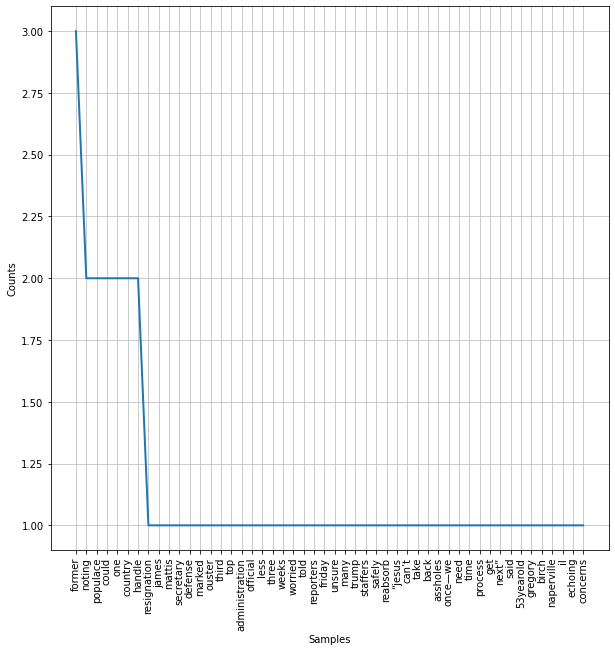

In [43]:
fdist = FreqDist(manual_cleanup)
plt.figure(figsize=(10,10))
fdist.plot(50)


In [44]:
manual_cleanup = [token for token in manual_cleanup if token not in stopwords.words('english')]

In [45]:
# We can also customize our stopwords list

custom_sw = stopwords.words('english')
custom_sw.extend(["i'd","say"] )
custom_sw[-10:]

['wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 "i'd",
 'say']

In [46]:
manual_cleanup = [token for token in manual_cleanup if token not in custom_sw]


In [47]:
print(f'After removing stopwords, there are {len(set(manual_cleanup))} unique words left')

After removing stopwords, there are 82 unique words left


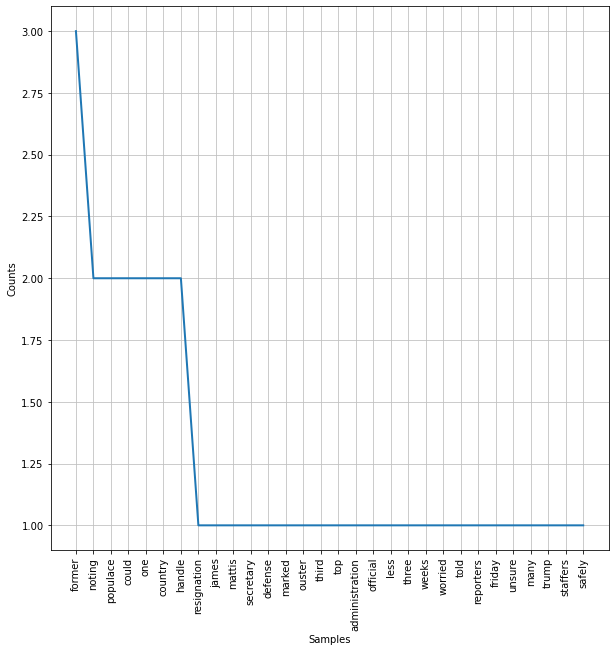

In [48]:
fdist = FreqDist(manual_cleanup)
plt.figure(figsize=(10,10))
fdist.plot(30)

In [ ]:
print(f'''{one_random_student(mccalister)}, based on the frequency plot above, 
    add some custome stopwords to our list, and remove them from our document. 
    Print out the frequency plot to confirm they have been removed.''')

In [49]:
# Code
custom_sw.extend(['could', 'one'])
manual_cleanup = [token for token in manual_cleanup if token not in custom_sw]

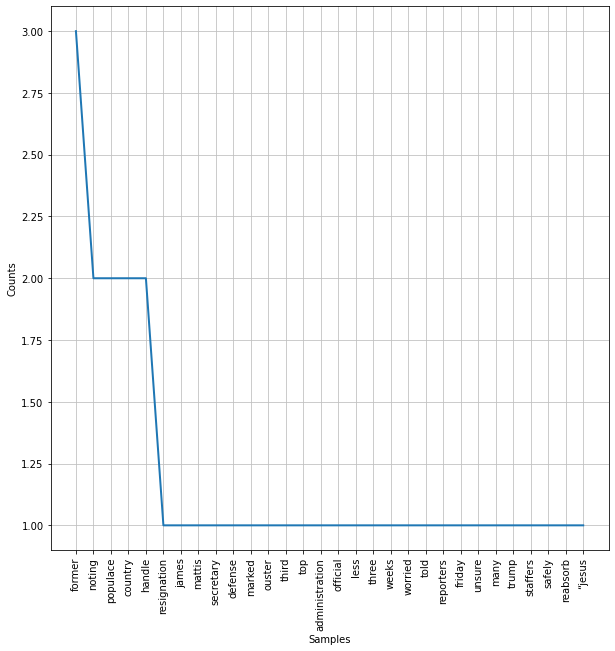

In [50]:
#__SOLUTION__
#custom_sw.extend(['could', 'one'])
#manual_cleanup = [token for token in manual_cleanup if token not in custom_sw]

fdist = FreqDist(manual_cleanup)
plt.figure(figsize=(10,10))
fdist.plot(30)

#### Numbers

Numbers also usually have low semantic value. Their removal can help improve our models. 

To remove them, we will use regular expressions, a powerful tool which you may already have some familiarity with.

Regex allows us to match strings based on a pattern.  This pattern comes from a language of identifiers, which we can begin exploring on the cheatsheet found here:
  -   https://regexr.com/

A few key symbols:
  - . : matches any character
  - \d, \w, \s : represent digit, word, whitespace  
  - *, ?, +: matches 0 or more, 0 or 1, 1 or more of the preceding character  
  - [A-Z]: matches any capital letter  
  - [a-z]: matches lowercase letter  

Other helpful resources:
  - https://regexcrossword.com/
  - https://www.regular-expressions.info/tutorial.html

We can use regex to isolate numbers



# Individual Code Exercise:  
Individually, test out different regex patterns to isolate numerical values in the first document.


In [51]:
first_document

'Noting that the resignation of James Mattis as Secretary of Defense marked the ouster of the third top administration official in less than three weeks, a worried populace told reporters Friday that it was unsure how many former Trump staffers it could safely reabsorb. “Jesus, we can’t just take back these assholes all at once—we need time to process one before we get the next,” said 53-year-old Gregory Birch of Naperville, IL echoing the concerns of 323 million Americans in also noting that the country was only now truly beginning to reintegrate former national security advisor Michael Flynn. “This is just not sustainable. I’d say we can handle maybe one or two more former members of Trump’s inner circle over the remainder of the year, but that’s it. This country has its limits.” The U.S. populace confirmed that they could not handle all of these pieces of shit trying to rejoin society at once.'

In [59]:
import re
pattern = '\d+'
number = re.findall( pattern, first_document)
number

['53', '323']

In [53]:
#__SOLUTION__
import re

# 1 or more digits
pattern = '\d+'

number = re.findall( pattern, first_document)
number

['53', '323']

In [54]:
number

['53', '323']

Sklearn and NLTK provide us with a suite of **tokenizers** for our text preprocessing convenience.

In [60]:
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer


In [61]:
first_document

'Noting that the resignation of James Mattis as Secretary of Defense marked the ouster of the third top administration official in less than three weeks, a worried populace told reporters Friday that it was unsure how many former Trump staffers it could safely reabsorb. “Jesus, we can’t just take back these assholes all at once—we need time to process one before we get the next,” said 53-year-old Gregory Birch of Naperville, IL echoing the concerns of 323 million Americans in also noting that the country was only now truly beginning to reintegrate former national security advisor Michael Flynn. “This is just not sustainable. I’d say we can handle maybe one or two more former members of Trump’s inner circle over the remainder of the year, but that’s it. This country has its limits.” The U.S. populace confirmed that they could not handle all of these pieces of shit trying to rejoin society at once.'

In [62]:
import re
re.findall(r"([a-zA-Z]+(?:'[a-z]+)?)" , "I'd")

["I'd"]

In [63]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(r"([a-zA-Z]+(?:[’'][a-z]+)?)")
first_doc = tokenizer.tokenize(first_document)
first_doc = [token.lower() for token in first_doc]
first_doc = [token for token in first_doc if token not in custom_sw]
first_doc[10]

'administration'

In [64]:
print(f'We are down to {len(set(first_doc))} unique words')

We are down to 77 unique words


# Stemming

Most of the semantic meaning of a word is held in the root, which is usually the beginning of a word.  Conjugations and plurality do not change the semantic meaning. "eat", "eats", and "eating" all have essentially the same meaning packed into eat.   

Stemmers consolidate similar words by chopping off the ends of the words.

![stemmer](img/stemmer.png)

There are different stemmers available.  The two we will use here are the **Porter** and **Snowball** stemmers.  A main difference between the two is how agressively it stems, Porter being less agressive.

In [65]:
from nltk.stem import *

p_stemmer = PorterStemmer()
s_stemmer = SnowballStemmer(language="english")

In [66]:
p_stemmer.stem(first_doc[0])

'note'

In [67]:
s_stemmer.stem(first_doc[0])

'note'

In [68]:
for word in first_doc:
    p_word = p_stemmer.stem(word)
    s_word = s_stemmer.stem(word)
    
    if p_word != s_word:
        print(p_word, s_word)
    

jesu jesus
can’t can't
napervil napervill
i’d i'd
trump’ trump
that’ that


In [69]:
first_doc = [p_stemmer.stem(word) for word in first_doc]

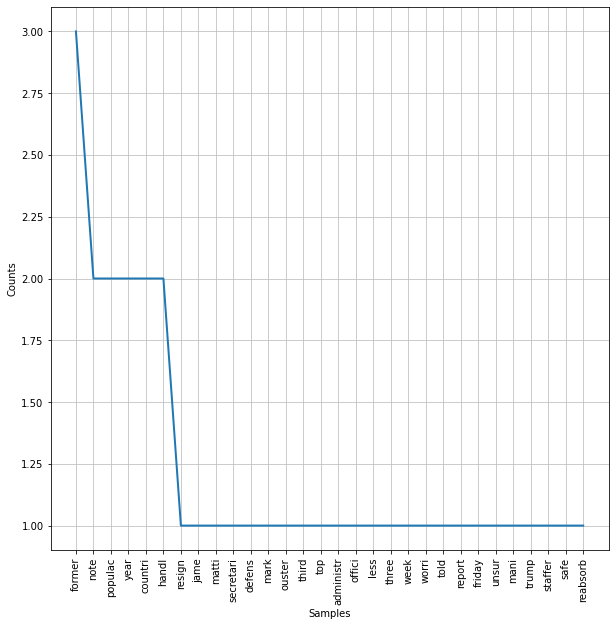

In [70]:
fdist = FreqDist(first_doc)
plt.figure(figsize=(10,10))
fdist.plot(30)

In [71]:
print(f'Stemming did not reduce our token count: {len(set(first_doc))} unique tokens')

Stemming did not reduce our token count: 77 unique tokens


# Lemming

Lemming is a bit more sophisticated that the stem choppers.  Lemming uses part of speech tagging to determine how to transform a word.  In that 
Lemmatization returns real words. For example, instead of returning "movi" like Porter stemmer would, "movie" will be returned by the lemmatizer.

- Unlike Stemming, Lemmatization reduces the inflected words properly ensuring that the root word belongs to the language.  It can handle words such as "mouse", whose plural "mice" the stemmers would not lump together with the original. 

- In Lemmatization, the root word is called Lemma. 

- A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

![lemmer](img/lemmer.png)


In [75]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/danielmorr/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [76]:
print(f'Mice becomes: {lemmatizer.lemmatize("mice")}')
print(f'Noting becomes: {lemmatizer.lemmatize(first_doc[0])}')

Mice becomes: mouse
Noting becomes: note


In [77]:
# However, look at the output below:
    
sentence = "He saw the trees get sawed down"
lemmed_sentence = [lemmatizer.lemmatize(token) for token in sentence.split(' ')]
lemmed_sentence

['He', 'saw', 'the', 'tree', 'get', 'sawed', 'down']

In [78]:
one_random_student(mccalister)
# What should have changed form but didn't?

'Amanda'

Lemmatizers depend on POS tagging, and defaults to noun.

In [79]:
one_random_student(mccalister)
# What do you think will happen if we feed another POS to saw?

'Adam'

With a little bit of work, we can POS tag our text.

In [80]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(r"([a-zA-Z]+(?:[’'][a-z]+)?)")
first_doc = tokenizer.tokenize(first_document)
first_doc = [token.lower() for token in first_doc]
first_doc = [token for token in first_doc if token not in custom_sw]
corpus.loc[0].body

'Noting that the resignation of James Mattis as Secretary of Defense marked the ouster of the third top administration official in less than three weeks, a worried populace told reporters Friday that it was unsure how many former Trump staffers it could safely reabsorb. “Jesus, we can’t just take back these assholes all at once—we need time to process one before we get the next,” said 53-year-old Gregory Birch of Naperville, IL echoing the concerns of 323 million Americans in also noting that the country was only now truly beginning to reintegrate former national security advisor Michael Flynn. “This is just not sustainable. I’d say we can handle maybe one or two more former members of Trump’s inner circle over the remainder of the year, but that’s it. This country has its limits.” The U.S. populace confirmed that they could not handle all of these pieces of shit trying to rejoin society at once.'

In [81]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/danielmorr/nltk_data...


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data]   Unzipping help/tagsets.zip.


In [83]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
# Use nltk's pos_tag to tag our words
# Does a pretty good job, but does make some mistakes
first_doc_tagged = pos_tag(first_doc)
first_doc_tagged

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/danielmorr/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('noting', 'VBG'),
 ('resignation', 'NN'),
 ('james', 'NNS'),
 ('mattis', 'VBP'),
 ('secretary', 'NN'),
 ('defense', 'NN'),
 ('marked', 'VBD'),
 ('ouster', 'JJ'),
 ('third', 'JJ'),
 ('top', 'JJ'),
 ('administration', 'NN'),
 ('official', 'NN'),
 ('less', 'JJR'),
 ('three', 'CD'),
 ('weeks', 'NNS'),
 ('worried', 'VBD'),
 ('populace', 'NN'),
 ('told', 'VBD'),
 ('reporters', 'NNS'),
 ('friday', 'JJ'),
 ('unsure', 'JJ'),
 ('many', 'JJ'),
 ('former', 'JJ'),
 ('trump', 'NN'),
 ('staffers', 'NNS'),
 ('safely', 'RB'),
 ('reabsorb', 'VBP'),
 ('jesus', 'NN'),
 ('can’t', 'NNS'),
 ('take', 'VBP'),
 ('back', 'RP'),
 ('assholes', 'NNS'),
 ('need', 'VBP'),
 ('time', 'NN'),
 ('process', 'NN'),
 ('get', 'VBP'),
 ('next', 'RB'),
 ('said', 'VBD'),
 ('year', 'NN'),
 ('old', 'JJ'),
 ('gregory', 'NN'),
 ('birch', 'NN'),
 ('naperville', 'FW'),
 ('il', 'NN'),
 ('echoing', 'VBG'),
 ('concerns', 'NNS'),
 ('million', 'CD'),
 ('americans', 'NNS'),
 ('also', 'RB'),
 ('noting', 'VBG'),
 ('country', 'NN'),
 ('truly

In [84]:
# Then transform the tags into the tags of our lemmatizers
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [85]:
first_doc_tagged = [(token[0], get_wordnet_pos(token[1]))
             for token in first_doc_tagged]

In [86]:
first_doc_lemmed = [lemmatizer.lemmatize(token[0], token[1]) for token in first_doc_tagged]

In [87]:
first_doc_lemmed[:10]

['note',
 'resignation',
 'james',
 'mattis',
 'secretary',
 'defense',
 'mark',
 'ouster',
 'third',
 'top']

In [88]:
print(f'There are {len(set(first_doc_lemmed))} unique lemmas')

There are 77 unique lemmas


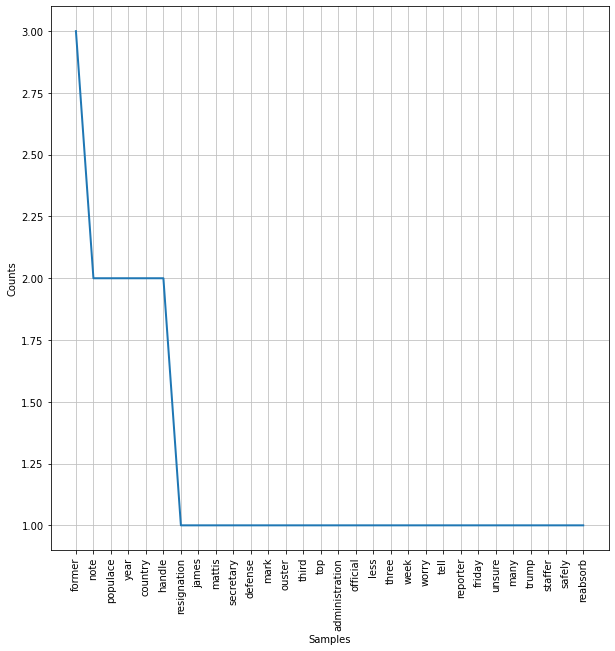

In [89]:
fdist = FreqDist(first_doc_lemmed)
plt.figure(figsize=(10,10))
fdist.plot(30)

## Part 3. Feature Engineering for NLP 
The machine learning algorithms we have encountered so far represent features as the variables that take on different value for each observation. For example, we represent individual with distinct education level, income, and such. However, in NLP, features are represented in very different way. In order to pass text data to machine learning algorithm and perform classification, we need to represent the features in a sensible way. One such method is called **Bag-of-words (BoW)**. 

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling. A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

- A vocabulary of known words.
- A measure of the presence of known words.

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document. The intuition behind BoW is that a document is similar to another if they have similar contents. Bag of Words method can be represented as **Document Term Matrix**, or Term Document Matrix, in which each column is an unique vocabulary, each observation is a document. For example:

- Document 1: "I love dogs"
- Document 2: "I love cats"
- Document 3: "I love all animals"
- Document 4: "I hate dogs"


Can be represented as:

![document term matrix](img/document_term_matrix.png)

In [90]:
# implementing it in python
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
# Convert a collection of text documents to a matrix of token counts

vec = CountVectorizer()
X = vec.fit_transform([" ".join(first_doc_lemmed)])


df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,administration,advisor,also,american,asshole,back,begin,birch,can,circle,...,time,top,truly,trump,try,two,unsure,week,worry,year
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,1,1,1,1,1,2


That is not very exciting for one document. The idea is to make a document term matrix for all of the words in our corpus.

In [91]:
corpus

,body,target
0,Noting that the resignation of James Mattis as...,1
1,Desperate to unwind after months of nonstop wo...,1
2,"Nearly halfway through his presidential term, ...",1
3,Attempting to make amends for gross abuses of ...,1
4,Decrying the Senate’s resolution blaming the c...,1
...,...,...
995,Britain’s opposition leader Jeremy Corbyn wou...,0
996,Turkey will take over the fight against Islam...,0
997,Malaysia is seeking $7.5 billion in reparatio...,0
998,An Israeli court sentenced a Palestinian to 1...,0


In [92]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw)
X = vec.fit_transform(corpus.body[0:2])

df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,adding,administration,advisor,also,americans,another,assholes,back,bank,beginning,...,want,wants,weeks,whether,whole,witnesses,work,worried,year,yet
0,0,1,1,1,1,0,1,1,0,1,...,0,0,1,0,0,0,0,1,2,0
1,1,0,0,0,0,1,0,1,1,0,...,2,1,1,1,1,1,1,0,0,1


In [93]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw, ngram_range=[1,2])
X = vec.fit_transform(corpus.body[0:2])

df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,adding,adding wants,administration,administration official,advisor,advisor michael,also,also noting,americans,americans also,...,witnesses want,work,work investigating,worried,worried populace,year,year country,year old,yet,yet another
0,0,0,1,1,1,1,1,1,1,1,...,0,0,0,1,1,2,1,1,0,0
1,1,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,1,1


Our document term matrix gets bigger and bigger, with more and more zeros, becoming sparser and sparser.

In [94]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw, ngram_range=[1,2])
X = vec.fit_transform(corpus.body)

df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,aa,aa united,aaaaaaah,aaaaaaah aaaaaah,aaaaaah,aaaaaah deal,aaaaargh,aaaaargh falls,aaaah,aaaah internet,...,zuercher kantonalbank,zverev,zverev two,zych,zych mother,zych whose,zzouss,zzzzzst,zzzzzst compilation,zzzzzst shut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can set upper and lower limits to the word frequency.

In [95]:
corpus.body

0      Noting that the resignation of James Mattis as...
1      Desperate to unwind after months of nonstop wo...
2      Nearly halfway through his presidential term, ...
3      Attempting to make amends for gross abuses of ...
4      Decrying the Senate’s resolution blaming the c...
                             ...                        
995     Britain’s opposition leader Jeremy Corbyn wou...
996     Turkey will take over the fight against Islam...
997     Malaysia is seeking $7.5 billion in reparatio...
998     An Israeli court sentenced a Palestinian to 1...
999     At least 22 people have died due to landslide...
Name: body, Length: 1000, dtype: object

In [96]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw, ngram_range=[1,2], min_df=2, max_df=25)
X = vec.fit_transform(corpus.body)

df_cv = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df_cv

,aapl,aaron,aaron ross,ab,abandon,abandon conservatives,abandoned,abandoned grassroots,abandoning,abandoning quarter,...,zone,zone eu,zones,zoo,zoo closed,zooming,zor,zte,zte corp,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF 
There are many schemas for determining the values of each entry in a document term matrix, and one of the most common schema is called the TF-IDF -- term frequency-inverse document frequency. Essentially, tf-idf *normalizes* the raw count of the document term matrix. And it represents how important a word is in the given document. 

> The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

- TF (Term Frequency)
term frequency is the frequency of the word in the document divided by the total words in the document.

- IDF (inverse document frequency)
IDF represents the measure of how much information the word provides, i.e., if it's common or rare across all documents. It is the logarithmically scaled inverse fraction of the documents that contain the word (obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient):

$$idf(w) = log (\frac{number\ of\ documents}{num\ of\ documents\ containing\ w})$$

tf-idf is the product of term frequency and inverse document frequency, or tf * idf. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw)
X = tf_vec.fit_transform(corpus.body)

df = pd.DataFrame(X.toarray(), columns = tf_vec.get_feature_names())
df.head()

In [ ]:
corpus.iloc[313].body

In [ ]:
df.iloc[313].sort_values(ascending=False)[:10]

Let's compare the tfidf to the count vectorizer output for one document.

In [ ]:
vec = CountVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=custom_sw)
X = vec.fit_transform(corpus.body)

df_cv = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df_cv

In [ ]:
df_cv.iloc[313].sort_values(ascending=False)[:10]

The tfidf lessoned the importance of some of the more common words, including a stopword which "also" which didn't make it into the stopword list.

It also assigns "nerds" more weight than power.  

In [ ]:
print(f'Nerds only shows up in document 313: {len(df_cv[df.nerds!=0])}')
print(f'Power shows up in {len(df_cv[df.power!=0])}')

In [ ]:
tf_vec.vocabulary_

# Pair: 

For a final exercise, work through in pairs the following exercise.

Create a document term matrix of the 1000 document corpus.  The vocabulary should have no stopwords, no numbers, no punctuation, and be lemmatized.  The Document-Term Matrix should be created using tfidf.

In [ ]:
#__SOLUTION__
corpus = pd.read_csv('data/satire_nosatire.csv')


In [ ]:
#__SOLUTION__
def doc_preparer(doc, stop_words=custom_sw):
    '''
    
    :param doc: a document from the satire corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in stop_words]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)


In [ ]:
#__SOLUTION__
docs = [doc_preparer(doc) for doc in corpus.body]

In [ ]:
#__SOLUTION__
tf_idf = TfidfVectorizer(min_df = .05)
X = tf_idf.fit_transform(docs)

df = pd.DataFrame(X.toarray())
df.columns = tf_idf.vocabulary_
df.head()